# Homework III

Gonçalo Bárias (ist1103124) & Raquel Braunschweig (ist1102624)

This Notebook mainly contains our solution for the programming and critical analysis section of the Homework (Part II). For the pen and paper section (Part I), we only include the numpy code used for the calculus. The full solution and details for Part I can be found on the pdf report.

## I. Pen and Paper [12v]

### 1) [6v]

In [ ]:
import numpy as np, math as mt

In [ ]:
def basis_function(x, c):
    return mt.exp(-1 / 2 * mt.dist(x, c) ** 2)

x = [[0.7, -0.3], [0.4, 0.5], [-0.2, 0.8], [-0.4, 0.3]]
c = [[0, 0], [1, -1], [-1, 1]]
z = [0.8, 0.6, 0.3, 0.3]

phi_matrix = []
for x_val in x:
    phi_matrix.append([1])  # phi_0 is always 1
    for c_j in c:
        phi_matrix[-1].append(basis_function(x_val, c_j))

In [ ]:
phi_matrix = np.array(phi_matrix)
phi_matrix_T = phi_matrix.transpose()

a = np.matmul(phi_matrix_T, phi_matrix)
b = np.add(a, 0.1 * np.identity(4))
c = np.linalg.pinv(b)
d = np.matmul(c, phi_matrix_T)

w = np.matmul(d, z)

In [ ]:
z_hat = np.matmul(phi_matrix, w)
the_sum = np.sum(np.square(np.subtract(z, z_hat)))
RMSE = mt.sqrt(1 / 4 * the_sum)

In [ ]:
print("*************** 1a.")
print("-- Phi -----------------------------------")
print(np.round(phi_matrix, 5))
print("-- Phi^T ---------------------------------")
print(np.round(phi_matrix_T, 5))
print("-- Phi^T*Phi -----------------------------")
print(np.round(a, 5))
print("-- Phi^T*Phi + 0.1I ----------------------")
print(np.round(b, 5))
print("-- (Phi^T*Phi + 0.1I)^(-1) ---------------")
print(np.round(c, 5))
print("-- (Phi^T*Phi + 0.1I)^(-1) * Phi^T -------")
print(np.round(d, 5))
print("-- w -------------------------------------")
print(np.round(w, 5))

print()

print("*************** 1b.")
print("-- z_hat ---------------------------------")
print(np.round(z_hat, 5))
print("-- the_sum -------------------------------")
print(round(the_sum, 5))
print("-- RMSE ----------------------------------")
print(round(RMSE, 5))

### 2) [6v]

In [ ]:
import numpy as np

# Define variables
W1 = np.array([[1, 1, 1, 1], [1, 1, 2, 1], [1, 1, 1, 1]])
b1 = np.array([[1], [1], [1]])

W2 = np.array([[1, 4, 1], [1, 1, 1]])
b2 = np.array([[1], [1]])

W3 = np.array([[1, 1], [3, 1], [1, 1]])
b3 = np.array([[1], [1], [1]])

x1 = np.array([[1], [1], [1], [1]])
x2 = np.array([[1], [0], [0], [-1]])

# Define the activation function
def activation_function(x):
    return np.tanh(0.5 * x - 2)

In [ ]:
# Step 1: Forward Pass
# for x1
z1_1 = np.dot(W1, x1) + b1
a1_1 = activation_function(z1_1)

z2_1 = np.dot(W2, a1_1) + b2
a2_1 = activation_function(z2_1)

z3_1 = np.dot(W3, a2_1) + b3
a3_1 = activation_function(z3_1)

# for x2
z1_2 = np.dot(W1, x2) + b1
a1_2 = activation_function(z1_2)

z2_2 = np.dot(W2, a1_2) + b2
a2_2 = activation_function(z2_2)

z3_2 = np.dot(W3, a2_2) + b3
a3_2 = activation_function(z3_2)

print("**Forward Pass for x1:")
print("z1:")
print(z1_1)
print("a1:")
print(np.round(a1_1, 5))
print("z2:")
print(np.round(z2_1, 5))
print("a2:")
print(np.round(a2_1, 5))
print("z3:")
print(np.round(z3_1, 5))
print("a3:")
print(np.round(a3_1, 5))

In [ ]:

print("**Forward Pass for x2:")
print("z1:")
print(np.round(z1_2, 5))
print("a1:")
print(np.round(a1_2, 5))
print("z2:")
print(np.round(z2_2, 5))
print("a2:")
print(np.round(a2_2, 5))
print("z3:")
print(np.round(z3_2, 5))
print("a3:")
print(np.round(a3_2, 5))
print()

In [ ]:
# Step 2: Backpropagation
# Define the derivative function
def derivative_function(x):
    return np.square(1 / np.cosh(0.5 * x - 2)) * 0.5

z_1 =  np.array([[-1], [1], [-1]])
z_2 =  np.array([[1], [-1], [-1]])

delta3_1 = np.multiply(a3_1 - z_1, derivative_function(z3_1))
delta2_1 = np.multiply(np.dot(W3.T, delta3_1), derivative_function(z2_1))
delta1_1 = np.multiply(np.dot(W2.T, delta2_1), derivative_function(z1_1))

print("**Backpropagation for x1:")
print("Delta 3:")
print(np.round(delta3_1, 5))
print("Delta 2:")
print(np.round(delta2_1, 5))
print("Delta 1:")
print(np.round(delta1_1, 5))

delta3_2 = np.multiply(a3_2 - z_2, derivative_function(z3_2))
delta2_2 = np.multiply(np.dot(W3.T, delta3_2), derivative_function(z2_2))
delta1_2 = np.multiply(np.dot(W2.T, delta2_2), derivative_function(z1_2))

print("**Backpropagation for x2:")
print("Delta 3:")
print(np.round(delta3_2, 5))
print("Delta 2:")
print(np.round(delta2_2, 5))
print("Delta 1:")
print(np.round(delta1_2, 5))
print()


In [ ]:
# Caculate derivatives
deriv_3 = np.dot(delta3_1, a2_1.T) + np.dot(delta3_2, a2_2.T)
deriv_2 = np.dot(delta2_1, a1_1.T) + np.dot(delta2_2, a1_2.T)
deriv_1 = np.dot(delta1_1, x1.T) + np.dot(delta1_2, x2.T)

print("3")
print(np.round(deriv_3, 5))
print("2")
print(np.round(deriv_2, 5))
print("1")
print(np.round(deriv_1, 5))
print()

In [ ]:
# Final step: calculate new weights and bias
W1_new = W1 - 0.1 * deriv_1
W2_new = W2 - 0.1 * deriv_2
W3_new = W3 - 0.1 * deriv_3

b1_new = b1 - 0.1 * (delta1_1 + delta1_2) 
b2_new = b2 - 0.1 * (delta2_1 + delta2_2) 
b3_new = b3 - 0.1 * (delta3_1 + delta3_2) 

print("For 1:")
print(np.round(W1_new, 5))
print(np.round(b1_new, 5))
print("For 2:")
print(np.round(W2_new, 5))
print(np.round(b2_new, 5))
print("For 3:")
print(np.round(W3_new, 5))
print(np.round(b3_new, 5))

## II. Programming and critical analysis [8v]

**Consider the `winequality-red.csv` dataset (available at the webpage) where the goal is to estimate
the quality (sensory appreciation) of a wine based on physicochemical inputs.**

**Using a 80-20 training-test split with a fixed seed (`random_state=0`), you are asked to learn MLP
regressors to answer the following questions.**

**Given their stochastic behavior, average the performance of each MLP from 10 runs
(for reproducibility consider seeding the MLPs with `random_state` ∈ {1..10}).**

### 1) [3v]

**Learn a MLP regressor with 2 hidden layers of size 10, rectifier linear unit activation
on all nodes, and early stopping with 20% of training data set aside for validation. All
remaining parameters (e.g., loss, batch size, regularization term, solver) should be set as
default. Plot the distribution of the residues (in absolute value) using a histogram.**

In [55]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [56]:
# Step 1: Load and prepare the dataset
data = pd.read_csv("./data/winequality-red.csv", sep=";")
X, y = data.drop("quality", axis=1), data["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.2, random_state=0)

In [ ]:
residues = []
for rs in range(1, 11):
    # Step 2: Learn the MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu",
                       early_stopping=True, validation_fraction=0.2,
                       random_state=rs)
    mlp.fit(X_train, y_train)

    # Step 3: Collect the residues
    y_pred = mlp.predict(X_test)
    residues.extend(np.abs(y_pred - y_test))

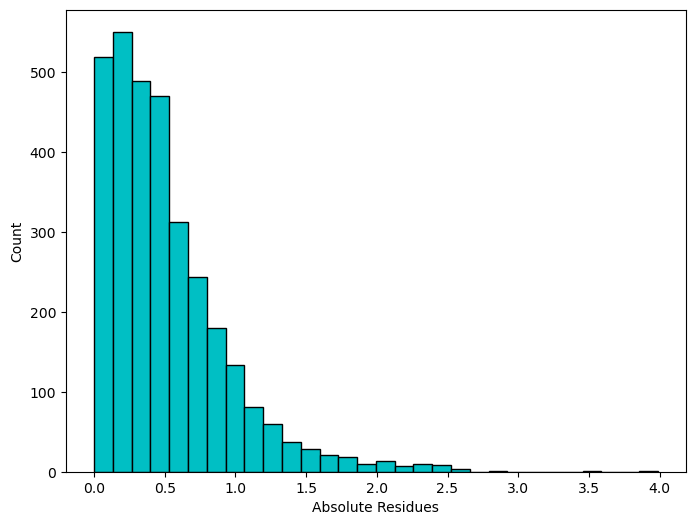

In [58]:
# Step 4: Plot the distribution of the absolute residues
plt.figure(figsize=(8, 6))
plt.hist(residues, bins=30, color = "#00bfc4", edgecolor="black")
plt.xlabel("Absolute Residues")
plt.ylabel("Count")
plt.show()

### 2) [1.5v]

**Since we are in the presence of a
_integer regression_ task, a recommended trick is to
round and bound estimates. Assess the impact of these operations on the MAE of the MLP
learnt in the previous question.**

In [ ]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
# Just like in the previous exercise
data = pd.read_csv("./data/winequality-red.csv", sep=";")
X, y = data.drop("quality", axis=1), data["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.2, random_state=0)

In [ ]:
y_preds = []
for rs in range(1, 11):
    # Train the MLP regressor with a specific number of iterations
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu",
                       early_stopping=True, validation_fraction=0.2,
                       random_state=rs)
    mlp.fit(X_train, y_train)
    
    # Predict the target values on the test set
    y_preds.append(mlp.predict(X_test))

In [52]:
# Apply rounding and bounding operations
y_pred = np.mean(y_preds, axis=0)
y_pred_rounded = np.round(y_pred)
y_pred_bounded = np.clip(y_pred, 1, 10)  # Bound between 1 and 10

# Calculate MAE for both rounded and bounded predictions
mae_rounded = mean_absolute_error(y_test, y_pred_rounded)
mae_bounded = mean_absolute_error(y_test, y_pred_bounded)

# Print the MAE for both cases
print(f"MAE with rounded predictions: {mae_rounded}")
print(f"MAE with bounded predictions: {mae_bounded}")

MAE with rounded predictions: 0.403125
MAE with bounded predictions: 0.48298403385683164


Blah

### 3) [1.5v]

**Similarly assess the impact on RMSE from replacing early stopping by a well-defined
number of iterations in {20,50,100,200} (where one iteration corresponds to a batch).**

In [ ]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Just like in the previous exercise
data = pd.read_csv("./data/winequality-red.csv", sep=";")
X, y = data.drop("quality", axis=1), data["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.2, random_state=0)

In [ ]:
n_iterations, rmse_scores = [20, 50, 100, 200], []
for n_iter in n_iterations:
    y_preds = []
    for rs in range(1, 11):
        # Train the MLP regressor with a specific number of iterations
        mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu",
                           max_iter=n_iter, validation_fraction=0.2,
                           random_state=rs)
        mlp.fit(X_train, y_train)
        
        # Predict the target values on the test set
        y_preds.append(mlp.predict(X_test))
    
    # Calculate RMSE
    y_pred = np.mean(y_preds, axis=0)
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))

In [53]:
# Print the RMSE for the different numbers of iterations
for i, n_iter in enumerate(n_iterations):
    print(f"RMSE with {n_iter} iterations: {rmse_scores[i]}")

RMSE with 20 iterations: 1.0336201651006487
RMSE with 50 iterations: 0.7060815422297181
RMSE with 100 iterations: 0.6641845695241441
RMSE with 200 iterations: 0.6393054830316605


### 4) [1.5v]

**Critically comment the results obtained in previous question, hypothesizing at least
one reason why early stopping favors and/or worsens performance.**

Blah